## Lab 10
## Gaussian Bandits: Exploration vs. Exploitation 

# Deadline: 14 December 2023 


In this lab, we will explore the trade-off between exploration and exploitation in a two-arm Gaussian bandit setting. The goal is to understand how different sampling strategies impact the cumulative reward obtained by an agent over time and how not-exploring enough prevents the agents from learning the distributions.

Key Components of Multi-Armed Bandits:

1) Arms:

Each arm represents an action or decision that the agent can take.
Pulling an arm corresponds to selecting an action or making a decision.

2) Rewards:

When an arm is pulled, a reward is received from a probability distribution associated with that arm.
The distribution of rewards for each arm is initially unknown to the agent.

3) Exploration vs. Exploitation:

Exploration: Trying different arms to gather information about their reward distributions.
Exploitation: Leveraging gathered information to maximize rewards by choosing arms that seem to be the best based on the available knowledge.

4) Regret:

In multi-armed bandit problems, regret is a metric that measures the opportunity loss incurred by not always selecting the best arm.
It quantifies how much the cumulative reward earned by the agent deviates from the maximum possible cumulative reward achievable by always selecting the best arm.



In [82]:
import numpy as np
import matplotlib.pyplot as plt
import math


Imagine a scenario with two arms (A and B) with reward distributions as Gaussian: 
Arm A with mean 5 and variance $\sigma$. and
Arm B with mean $\mu$ and variance 1.

In this lab $\mu$ will always be greater than $5$.

An oracle with full-knowledge of the distributions will always select arm B. However, when an agent does not have any information regarding the distributions (other than the distributions being Gaussian), finding the optimal arm takes some time. In this problem, the regret that agent obtains depends on how many times, it selects the arm A (which is the suboptimal arm). Let us denote the total number of times arm A is selected as $n_A$. Then the cumulative regret will be $n_A* (\mu - 5)$.






## The Simulation Environment

The time horizon of a single simulation will be denoted as T.

1) Create variables that keep track of the average reward obtained by pullin the arms, and how many times those arms are selected. Maintain variables num_trial_arm_a and average_reward_arm_a for Arm A and num_trial_arm_b and average_reward_arm_b for Arm B, to keep track of the number of times each arm is chosen and their respective average rewards. 

2) Create a For loop for $t=  1:T$.

3) At each iteration $t$, the agent will choose one arm using a function that will be specified.

4) At each iteration $t$, the agent will obtain a reward. The reward will be sampled from the distribution $\mathcal{N}(5,\sigma)$ if the agent pulls arm A. The reward will be sampled from the distribution $\mathcal{N}(\mu,1)$ if the agent pulls arm B. You can use the numpy.random.normal function for generating the samples.

5) At each iteration $t$, the agent will increasenum_trial_arm_ $i$ by one when it selects arm $i$ for $i \in \{ A,B\}$.

6) At each iteration $t$, the agent will update the average observed rewards (average_reward_arm_ $i$ ).



## Sampling Function for Part 1

The million dollar question in  Multi-Armed Bandit problems is how to select the sampling function. In the first question, you will act as a myopic agent. At each iteration of $t$, you are going to call a function called: sample_arm_greedy(average_reward_arm_a,average_reward_arm_b). 

The function will output which arm to select. If average_reward_arm_a $>$ average_reward_arm_b, the agent will sample arm A, if not it will sample the arm B.

Here, at every single iteration the agent acts greedily. It does not explores but fully exploits. 

## Part 1 Tasks (40 Points):


1) Write a code for simulating the given environment and the greedy sampling function.

2) Run simulations for $T = 200$ and $\sigma \in  \{0.1, 1,5,10\}$, $\mu \in  \{5.001,5.1,10\}$. Run $100$ simulations FOR EACH $(\mu,\sigma)$ pair and calculate the average cumulative regret FOR EACH $(\mu,\sigma)$ pair. This will be the sum of all simulation-wise cumulative regrets divided by 100. For a single simulation, the cumulative regret is given as num_trial_arm_A(T)$*(\mu - 5)$ where num_trial_arm_A(T) is the value of num_trial_arm_A at the end of iteration $t = T$ Do not forget to make average-reward_ $i$ and num_trial_arm_ $i$ zero at the start of every simulation.

3) Run 100 simulation for $T = 1000$ with $\sigma = 5$ and $\mu = 5.1$. Calculate the average amount of time arm A is played at each iteration (The averaging is done over the 100 simulations.). Let us denote that vector as $n_A^T$. (Note that this vector will have length $T$) Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v.

4) Run 100 simulation for $T = 1000$ with $\sigma = 0.1$ and $\mu = 5.1$. Calculate the average amount of time arm A is played at each iteration. Let us denote that vector as $n_A^T$. Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v.


5) Run 100 simulation for $T = 1000$ with $\sigma = 1$ and $\mu = 5.1$. Calculate the average amount of time arm A is played at each iteration. Let us denote that vector as $n_A^T$. Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v.

In [117]:
#T = 1000
mu_Bvec = [5.001, 5.1, 10]
sigma_Avec = [0.1, 1, 5, 10]
num_simulations = 100


def sample_arm_greedy(average_reward_arm_a,average_reward_arm_b):
    if average_reward_arm_a >= average_reward_arm_b:
        return 'A'
    else:
        return 'B'


def sim_env(mu_B, sigma_A, T):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    cumulative_regret = 0

    for t in range(1, T + 1):
        if t == 1:
            reward_a_initial = np.random.normal(5, sigma_A)
            reward_b_initial = np.random.normal(mu_B, 1)
            
            n_vector[t-1] += 1 
            
            num_trial_arm_a += 1
            num_trial_arm_b += 1
            average_reward_arm_a = reward_a_initial
            average_reward_arm_b = reward_b_initial
        else:
            chosen = sample_arm_greedy(average_reward_arm_a,average_reward_arm_b)
            if chosen == 'A':
                n_vector[t - 1] += 1 
                curr_reward = np.random.normal(5, sigma_A)
                num_trial_arm_a = num_trial_arm_a + 1
                average_reward_arm_a = ((average_reward_arm_a*(num_trial_arm_a - 1)) + curr_reward)/num_trial_arm_a
            else:
                curr_reward = np.random.normal(mu_B, 1)
                num_trial_arm_b = num_trial_arm_b + 1
                average_reward_arm_b = ((average_reward_arm_b*(num_trial_arm_b - 1)) + curr_reward)/num_trial_arm_b

            cumulative_regret += num_trial_arm_a * (mu_B - 5)

    return cumulative_regret


T_runs = 200
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)


average_cumulative_regrets = {}
for mu_B in mu_Bvec:
    for sigma_A in sigma_Avec:
        cumulative_regrets = []
        for _ in range(num_simulations):
            regret = sim_env(mu_B, sigma_A, T_runs)
            cumulative_regrets.append(regret)
        average_cumulative_regrets[(mu_B, sigma_A)] = sum(cumulative_regrets) / num_simulations
        print("For (mu, sigma) = (",mu_B,",", sigma_A,") avg cumulative regrets = ", average_cumulative_regrets[(mu_B, sigma_A)] )

        

For (mu, sigma) = ( 5.001 , 0.1 ) avg cumulative regrets =  16.440880000005517
For (mu, sigma) = ( 5.001 , 1 ) avg cumulative regrets =  8.972250000003013
For (mu, sigma) = ( 5.001 , 5 ) avg cumulative regrets =  3.6383600000012204
For (mu, sigma) = ( 5.001 , 10 ) avg cumulative regrets =  3.1051800000010417
For (mu, sigma) = ( 5.1 , 0.1 ) avg cumulative regrets =  1475.4909999999952
For (mu, sigma) = ( 5.1 , 1 ) avg cumulative regrets =  761.2499999999975
For (mu, sigma) = ( 5.1 , 5 ) avg cumulative regrets =  447.6469999999988
For (mu, sigma) = ( 5.1 , 10 ) avg cumulative regrets =  292.0849999999991
For (mu, sigma) = ( 10 , 0.1 ) avg cumulative regrets =  995.0
For (mu, sigma) = ( 10 , 1 ) avg cumulative regrets =  995.0
For (mu, sigma) = ( 10 , 5 ) avg cumulative regrets =  1275.75
For (mu, sigma) = ( 10 , 10 ) avg cumulative regrets =  1846.1


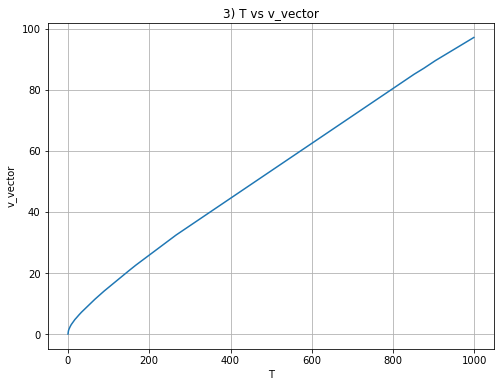

In [118]:
T_runs = 1000
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)
for _ in range(100):
    sim_env(5.1, 5, T_runs)

for i in range(0,T_runs):
    n_vector[i] = n_vector[i]/100


for i in range (0,T_runs):
    for j in range(0,i):
        v_vector[i] += n_vector[j]

import matplotlib.pyplot as plt

n_vector
# Plotting T vs v_vector
plt.figure(figsize=(8, 6))
plt.plot(range(T_runs), v_vector)
plt.xlabel('T')
plt.ylabel('v_vector')
plt.title('3) T vs v_vector')
plt.grid(True)
plt.show()



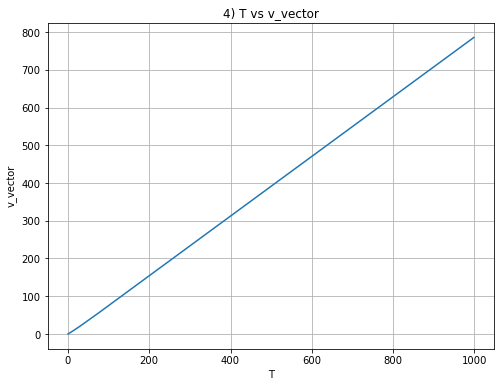

In [119]:
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)
for _ in range(100):
    sim_env(5.1, 0.1, T_runs)


for i in range(0,T_runs):
    n_vector[i] = n_vector[i]/100


for i in range (0,T_runs):
    for j in range(0,i):
        v_vector[i] += n_vector[j]

plt.figure(figsize=(8, 6))
plt.plot(range(T_runs), v_vector)
plt.xlabel('T')
plt.ylabel('v_vector')
plt.title('4) T vs v_vector')
plt.grid(True)
plt.show()

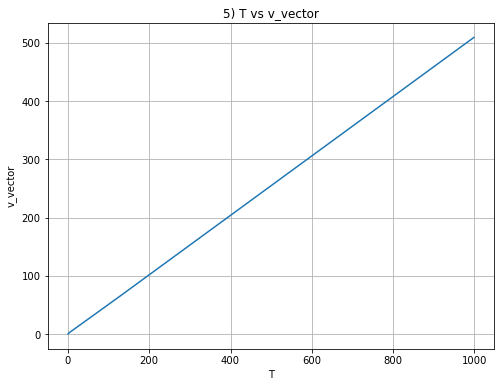

In [120]:
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)
for _ in range(100):
    sim_env(5.1, 1, T_runs)

for i in range(0,T_runs):
    n_vector[i] = n_vector[i]/100


for i in range (0,T_runs):
    for j in range(0,i):
        v_vector[i] += n_vector[j]

import matplotlib.pyplot as plt

n_vector
# Plotting T vs v_vector
plt.figure(figsize=(8, 6))
plt.plot(range(T_runs), v_vector)
plt.xlabel('T')
plt.ylabel('v_vector')
plt.title('5) T vs v_vector')
plt.grid(True)
plt.show()


## Sampling Function for Part 2

In the second part, you will utilize the ETC algorithm. The algorithm can be found in the 6.1 Algorithm and Regret Analysis section of Bandit Algorithms book by Tor Lattimore and Csaba Szepesv´ari. Note that this algorithm is dependent on the variance of the rewards. Thus for simplicity, we will use the following rewards distributions: Arm A with reward distribution $\mathcal{N}(5,1)$ and Arm B with reward distribution $\mathcal{N}(\mu,1)$.

 At each iteration of $t$, you are going to call a function called: sample_arm_ETC(average_reward_arm_a,average_reward_arm_b,t). 

 The agent will explore each arm $m$ times, and after $t>2m$, the agent will exploit by selecting the arm with the highest average reward. Select $m$ as $\sqrt{T}/2$, unless it is asked otherwise.


## Part 2 Tasks (30 Points):


1) Write a code for the ETC sampling function.

2) Run simulations for $T = 200$ and  $\mu \in  \{5.001,5.1,10\}$. Run $100$ simulations FOR EACH $\mu$ value and calculate the average cumulative regret FOR EACH $\mu$ . (It will be the sum of all simulation-wise cumulative regrets divided by 100.) Comment on the affect of changing $\mu$ .

##### An increasing mu results in an increasing regret. This is because if arm B is expected to yield higher reward (due to mu), pulling arm A becomes that much more of a loss when arm B is drastically more rewarding.

3) Run 100 simulation for $T = 1000$ with $\sigma = 1$. Calculate the average amount of time arm A is played at each iteration. Let us denote that vector as $n_A^T$. Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v. Compare it with the greedy sampling strategy.

##### The plot in this one grows far slower than the plot from the greedy sampling strategy, meaning Greedy Sampling strategy chooses arm A incorrectly more than ETC. 

4) Run simulations for $T = 200$,  $\mu =  \{5.1\}$ and $m \in \{\sqrt{T}/4, \sqrt{T}/2,T/2\}$. Comment on the affect of the exploration parameter $m$. Connect that to the regret bound given by Theorem 6.1 in Bandit Algorithms book.

##### Here, it was clear to see that higher m values resulted in higher regret values, which makes sense, considering mu was close to the mean of arm A. Exploring longer (higher m) results in higher regret, which is clearly shown by theorem 6.1 by the E(Ti(n)) term, which shows positive correlation between Regret and m.

In [131]:
#QN 1, 2
mu_Bvec = [5.001, 5.1, 10]
num_simulations = 100

def sample_arm_ETC(average_reward_arm_a, average_reward_arm_b, t):
    if t <= 2 * m:
        action = (t%2)+1
        if action == 1:
            return 'A'
        else:
            return 'B'
    else:
        if average_reward_arm_a > average_reward_arm_b:
            return 'A'
        else:
            return 'B'
        
def sim_env(mu_B, sigma_A, T):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    cumulative_regret = 0

    for t in range(1, T + 1):
        if t == 1:
            reward_a_initial = np.random.normal(5, 1)
            reward_b_initial = np.random.normal(mu_B, 1)

            n_vector[t - 1] += 1 
            
            num_trial_arm_a += 1
            num_trial_arm_b += 1
            average_reward_arm_a = reward_a_initial
            average_reward_arm_b = reward_b_initial
        else:
            chosen = sample_arm_ETC(average_reward_arm_a, average_reward_arm_b, t)
            if chosen == 'A':
                n_vector[t - 1] += 1 
                curr_reward = np.random.normal(5, 1)
                num_trial_arm_a = num_trial_arm_a + 1
                average_reward_arm_a = ((average_reward_arm_a*(num_trial_arm_a - 1)) + curr_reward)/num_trial_arm_a
            else:
                curr_reward = np.random.normal(mu_B, 1)
                num_trial_arm_b = num_trial_arm_b + 1
                average_reward_arm_b = ((average_reward_arm_b*(num_trial_arm_b - 1)) + curr_reward)/num_trial_arm_b

            cumulative_regret += num_trial_arm_a * (mu_B - 5)

    return cumulative_regret


T_runs = 200
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)
m = math.sqrt(T_runs)/2

average_cumulative_regrets = {}
for mu_B in mu_Bvec:
    cumulative_regrets = []
    for _ in range(num_simulations):
        regret = sim_env(mu_B, 1, T_runs)
        cumulative_regrets.append(regret)
    average_cumulative_regrets[(mu_B, 1)] = sum(cumulative_regrets) / num_simulations
    print("For (mu, sigma) = (",mu_B,",", 1,") avg cumulative regrets = ", average_cumulative_regrets[(mu_B, 1)] )


For (mu, sigma) = ( 5.001 , 1 ) avg cumulative regrets =  11.467220000003845
For (mu, sigma) = ( 5.1 , 1 ) avg cumulative regrets =  758.0669999999976
For (mu, sigma) = ( 10 , 1 ) avg cumulative regrets =  7750.0


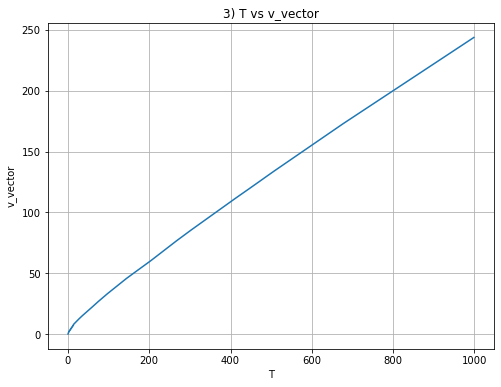

In [132]:
# QN 3
T_runs = 1000
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)
for _ in range(100):
    sim_env(5.1, 1, T_runs)

for i in range(0,T_runs):
    n_vector[i] = n_vector[i]/100


for i in range (0,T_runs):
    for j in range(0,i):
        v_vector[i] += n_vector[j]

import matplotlib.pyplot as plt

# Plotting T vs v_vector
plt.figure(figsize=(8, 6))
plt.plot(range(T_runs), v_vector)
plt.xlabel('T')
plt.ylabel('v_vector')
plt.title('3) T vs v_vector')
plt.grid(True)
plt.show()




In [133]:
# QN 4
T_runs = 200
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)

m_vec = [math.sqrt(T_runs)/4,math.sqrt(T_runs)/2,T_runs/2]

average_cumulative_regrets = {}
for m in m_vec:
    cumulative_regrets = []
    for _ in range(num_simulations):
        regret = sim_env(5.1, 1, T_runs)
        cumulative_regrets.append(regret)
    average_cumulative_regrets[(5.1, 1)] = sum(cumulative_regrets) / num_simulations
    print("For m = ", m ,", avg cumulative regrets = ", average_cumulative_regrets[(5.1, 1)] )



For m =  3.5355339059327378 , avg cumulative regrets =  847.8499999999966
For m =  7.0710678118654755 , avg cumulative regrets =  874.9169999999972
For m =  100.0 , avg cumulative regrets =  1019.8999999999951



## Sampling Function for Part 3

In the third part, you will utilize the UCB algorithm. The algorithm can be found in the 7.1 Algorithm and Regret Analysis section of Bandit Algorithms book by Tor Lattimore and Csaba Szepesv´ari. It is the Algorithm 3.  Note that this algorithm is dependent on the variance of the rewards. Thus for simplicity, we will use the following rewards distributions: Arm A with reward distribution $\mathcal{N}(5,1)$ and Arm B with reward distribution $\mathcal{N}(\mu,1)$.

 At each iteration of $t$, you are going to call a function called: sample_arm_UCB(average_reward_arm_a,average_reward_arm_b, num_trial_arm_A, num_trial_arm_B, t). 

 Select the $\delta$ in the algorithm as $1/T^2$.



## Part 3 Tasks (30 Points):



1) Write a code for the UCB sampling function.

Select $\delta$ as $1/T^2$.


2) Run 100 simulation for $T = 1000$ with $\sigma = 1$. Calculate the average amount of time arm A is played at each iteration. Let us denote that vector as $n_A^T$. Generate another vector $v$ such that $v(i) = \sum_{j =1}^i n_A^T(j))$. Plot t vs v. Compare it with the greedy sampling strategy and the ETC algorithm. 

##### This has a much higher rate of increase of v than either of the two previous algorithms. It's increasing at an almost similar factor as T increases, and ends up significantly higher than the greedy sampling strategy and the ETC algorithm. 

4) Run simulations for $T = 200$ and  $\mu =  \{5.1\}$ and $\delta = 1/T$. Comment on the affect of the exploration parameter $\delta$. 

##### The exploration parameter $\delta$ shows a clear effect on the v, and in turn the regret. For increasing T, when $\delta$ is changed to 1/T from 1/T^2, we can see that the value of delta is higher in this case. As this result plotted v at nearly half the gradient (meaning we made the incorrect choice of pulling arm A much less), we understand that increasing delta results in lowering the regret.

In [137]:
# QN 1
def sample_arm_UCB(average_reward_arm_a,average_reward_arm_b, num_trial_arm_a, num_trial_arm_b, t):
    valueA = 0
    valueB = 0
    if num_trial_arm_a == 0:
        valueA = 9999999999999999999999999999
    else:
        valueA = average_reward_arm_a + math.sqrt((2*np.log(1/delta))/num_trial_arm_a)
    
    if num_trial_arm_b == 0:
        valueB = 9999999999999999999999999999
    else:
        valueB = average_reward_arm_b + math.sqrt((2*np.log(1/delta))/num_trial_arm_a)
    
    #result = argmax(valueA, valueB) is done below
    
    
    if valueA > valueB:
        return 'A'
    else:
        return 'B'

def sim_env(mu_B, sigma_A, T):
    num_trial_arm_a = 0
    num_trial_arm_b = 0
    cumulative_regret = 0

    for t in range(1, T + 1):
        if t == 1:
            reward_a_initial = np.random.normal(5, sigma_A)
            reward_b_initial = np.random.normal(mu_B, 1)
            
            n_vector[t-1] += 1 
            
            num_trial_arm_a += 1
            num_trial_arm_b += 1
            average_reward_arm_a = reward_a_initial
            average_reward_arm_b = reward_b_initial
        else:
            chosen = sample_arm_UCB(average_reward_arm_a,average_reward_arm_b, num_trial_arm_a, num_trial_arm_b, t)
            if chosen == 'A':
                n_vector[t - 1] += 1 
                curr_reward = np.random.normal(5, sigma_A)
                num_trial_arm_a = num_trial_arm_a + 1
                average_reward_arm_a = ((average_reward_arm_a*(num_trial_arm_a - 1)) + curr_reward)/num_trial_arm_a
            else:
                curr_reward = np.random.normal(mu_B, 1)
                num_trial_arm_b = num_trial_arm_b + 1
                average_reward_arm_b = ((average_reward_arm_b*(num_trial_arm_b - 1)) + curr_reward)/num_trial_arm_b

            cumulative_regret += num_trial_arm_a * (mu_B - 5)

    return cumulative_regret


T_runs = 1000
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)
delta = 1/(T**2)

average_cumulative_regrets = {}
cumulative_regrets = []
for _ in range(num_simulations):
    regret = sim_env(5.1, 1, T_runs)
    cumulative_regrets.append(regret)
average_cumulative_regrets[(5, 1)] = sum(cumulative_regrets) / num_simulations
#print("For (mu, sigma) = (",mu_B,",", sigma_A,") avg cumulative regrets = ", average_cumulative_regrets[(mu_B, sigma_A)] )




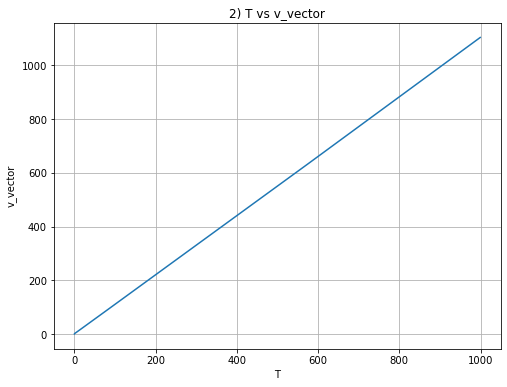

In [138]:
#QN 2
for _ in range(100):
    sim_env(5, 1, T_runs)

for i in range(0,T_runs):
    n_vector[i] = n_vector[i]/100


for i in range (0,T_runs):
    for j in range(0,i):
        v_vector[i] += n_vector[j]

import matplotlib.pyplot as plt

n_vector
# Plotting T vs v_vector
plt.figure(figsize=(8, 6))
plt.plot(range(T_runs), v_vector)
plt.xlabel('T')
plt.ylabel('v_vector')
plt.title('2) T vs v_vector')
plt.grid(True)
plt.show()

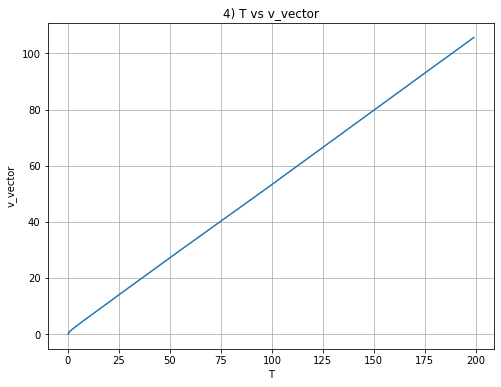

In [139]:
# QN 4
T_runs = 200
n_vector = np.zeros(T_runs)
v_vector = np.zeros(T_runs)
delta = 1/(T)

for _ in range(100):
    sim_env(5, 1, T_runs)

for i in range(0,T_runs):
    n_vector[i] = n_vector[i]/100


for i in range (0,T_runs):
    for j in range(0,i):
        v_vector[i] += n_vector[j]

import matplotlib.pyplot as plt

n_vector
# Plotting T vs v_vector
plt.figure(figsize=(8, 6))
plt.plot(range(T_runs), v_vector)
plt.xlabel('T')
plt.ylabel('v_vector')
plt.title('4) T vs v_vector')
plt.grid(True)
plt.show()

## Part 4 (60 Points): Finally, let us think a little bit more about the theory and aplicability of Multi-Armed Bandits.

Please answer the following questions. Each question is worth 10 points. Last question is worth 20 points.

Q1: Can an agent completely eliminate regret in a multi-armed bandit scenario? Why or why not?

##### No, an agent cannot usually completely eliminate regret in a scenario where distributions are unkown to some extent. This is because an agent does not know which arm is the optimal one, and requires some manner of exploration to find out. This inherently means there will be regret.

Q2:What strategies might be effective in handling scenarios where reward distributions change over time?

##### Strategies such as variable exploration, which adjusts exploration rates based on the perceived stability of the environment, would be effective. This means the algorithm would exploit when the environment is thought to be stable, resulting in more predictable rewards. Another strategy could be to weight recent experimental data more heavily than older ones if we can assume that more recent data is more indicative of current rewards.

Q3:How might multi-armed bandits be utilized in optimizing decision-making in industries like healthcare, finance, or technology?

##### They would clearly be very useful in optimizing decision making. For instance, it would help in healthcare by more efficiently exploiting known successful treatments while also exploring new methods. Finance, which harbors everchanging data, would be extremely suited to multi-armed bandits as it would easily aid decision making by exploring options while exploiting profitable options in real time. This is an extension of the previous question, which discussed reward distributions changing over time. Technology could use this in many ways. For instance, the way a feed on social media is customized to the user, would benefit from this, as it requires a skillful balance of new explorations (content that user has not interacted with) and known exploitations (content that user typically enjoys). 

Q4:Are there scenarios where the exploration-exploitation trade-off becomes particularly difficult to manage?

##### One such possibility is where the decision being made is an extremely high-risk decision. For example, being able to correctly state that a natural disaster is about to strike when it is is extremely important. A miss would be fatal. Here, researchers need to be constantly exploring for new methods of doing this (as dangerous weather can be hard to predict), but must also never fail to exploit (choose the best possible method for stating when and where natural disasters could strike). 


Q5 (20 points): Explain Thompson Sampling as a way to solve this problem (as a way to achieve Exploration/Exploitation balance). You will need to use the Bayes' update rule, so first you should explain the Bayes' update rule. For that, you can give an example. You can explain Thompson Sampling Algorithm better with a detailed pseudo-code that consist of the Bayesin updates.

The Bayes' update rule refers to us first having a prior distribution of rewards from the arms, and as we pull them, we update the distributions of the arms (with empirical collected data) as there is now more information available.

Eg: If Arms A and B are normally distributed with means mu1 and mu2, and respective standard deviations, we are already aware of the expected rewards. However, as we pull them, we modify the distribution to fit what we measure so that we can improve our decision making.         

As such, the Thomson Sampling Algorithm is one that continuously learns while observing reward distributions. It has preconceived probabilities, and improves upon them while "pulling arms" by using the Bayes Update rule which is explained above, and shown with pseudocode below. It balances exploration and exploitation as it supports arms with high yield while also exploring new avenues by updating distributions of all arms.
